In [6]:
import sys
sys.path.append("..")

# Reload modules in /src/ when changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fxml.trading.strategies.trendline_breakout.trendline_automation import fit_trendlines_single, fit_trendlines_high_low

In [8]:
# Load data
data = pd.read_pickle("../data/resampled/EURUSD-60m-20210101-20241231.pkl")
data["timestamp"] = data["timestamp"].astype("datetime64[s]")
data = data.set_index("timestamp")
data.head()

,open,high,low,close,volume,spread
timestamp,,,,,,
2021-01-03 22:00:00,1.224035,1.224260,1.223160,1.223435,3.329510e+12,0.000152
2021-01-03 23:00:00,1.223415,1.225280,1.223115,1.225015,1.089952e+13,0.000075
2021-01-04 00:00:00,1.225010,1.225010,1.223875,1.224080,1.429532e+13,0.000039
2021-01-04 01:00:00,1.224090,1.225580,1.224000,1.225270,1.800660e+13,0.000039
2021-01-04 02:00:00,1.225265,1.225865,1.224955,1.225400,1.490831e+13,0.000037


In [9]:
def trendline_breakout(high, low, close: np.array, lookback:int):
    s_tl = np.zeros(len(close))
    s_tl[:] = np.nan

    r_tl = np.zeros(len(close))
    r_tl[:] = np.nan

    sig = np.zeros(len(close))

    for i in range(lookback, len(close)):
        # NOTE window does NOT include the current candle
        high_window = high[i - lookback: i]
        low_window = low[i - lookback: i]
        close_window = close[i - lookback: i]

        s_coefs, r_coefs = fit_trendlines_high_low(high_window, low_window, close_window)

        # Find current value of line, projected forward to current bar
        s_val = s_coefs[1] + lookback * s_coefs[0] 
        r_val = r_coefs[1] + lookback * r_coefs[0] 

        s_tl[i] = s_val
        r_tl[i] = r_val

        if close[i] > r_val:
            sig[i] = 1.0
        elif close[i] < s_val:
            sig[i] = -1.0
        else:
            sig[i] = sig[i - 1]

    return s_tl, r_tl, sig

/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 24 0.976450778709106


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 26 0.9717363305814275


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 28 0.9727832294325471


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 30 0.9743896568577757


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 32 0.9706938106000844


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 34 0.9679436027692413


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 36 0.9749060287407078


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 38 0.9700264317604769


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 40 0.9579245398288505


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 42 0.9671430776640352


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 44 0.9617291279552166


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 46 0.9669114231774997


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 48 0.9761816326481609


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 50 0.9816001062897635


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 52 0.9664370038892237


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 54 0.9714575170480695


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 56 0.981637310793233


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 58 0.9899622541683912


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 60 0.9813162706812938


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 62 0.9878845533728161


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 64 0.9823318939755507


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 66 0.9956997168001932


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 68 0.9872564268931745


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 70 0.982838016114758


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 72 0.9828813087888368


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 74 0.9900393985894358


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 76 0.9924759327480738


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 78 0.9951348512767407


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 80 0.9996763075557308


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 82 0.9968377817411107


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 84 0.9956421506930276


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 86 0.9904850111528987


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 88 0.9862574503271359


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 90 0.9875128864436624


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 92 0.9826675491561565


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 94 0.9808252540249168


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 96 0.9798537777274471


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 98 0.9798273092123362


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 100 0.9853448562520082


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 102 0.9821657573739225


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 104 0.9714721823792055


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 106 0.9650800205923243


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 108 0.9666138761262962


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 110 0.9662449211121711


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 112 0.9666955022512951


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 114 0.9708372353265686


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 116 0.9675906661910411


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 118 0.9628821227947215


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 120 0.9656267832075789


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 122 0.9706433057594188


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 124 0.9704200029639982


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 126 0.9694045205971814


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 128 0.9740046260092513


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 130 0.9775811529122065


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 132 0.9721504398266431


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 134 0.9802284926669849


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 136 0.9835858587592139


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])
IOStream.flush timed out
IOStream.flush timed out


Profit Factor 138 0.9811613041238656


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 140 0.9793950159190689


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 142 0.9813906712767991


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 144 0.9815733353528431


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 146 0.9858518673875365


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 148 0.9841224665675943


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 150 0.982858009319583


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 152 0.9847625116650184


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 154 0.9833422135584777


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 156 0.9850248476731771


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 158 0.9845865591716965


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 160 0.9893522220766876


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 162 0.988097607983509


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 164 0.9878845566744602


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 166 0.9916828249742285


/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
/Users/yoyo/personal/fxml/fxml/trading/strategies/trendline_breakout/trendline_automation.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (best_slope, -best_slope * pivot + y[pivot])


Profit Factor 168 0.9971803031320533
CPU times: user 1h 5min 15s, sys: 4min 29s, total: 1h 9min 45s
Wall time: 1h 5min 53s


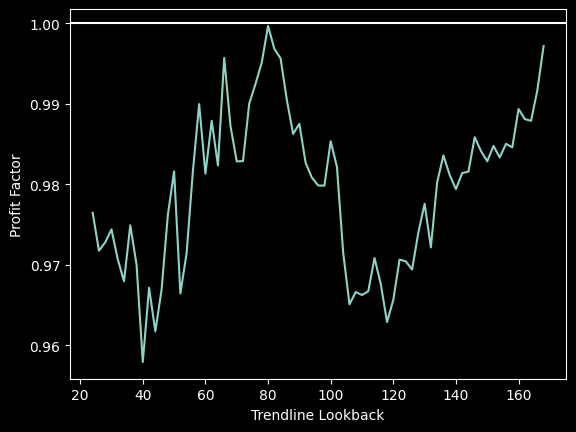

In [13]:
## Parameter Sweep

lookbacks = list(range(24, 169, 2))
pfs = []

lookback_returns = pd.DataFrame()
for lookback in lookbacks:
    support, resist, signal = trendline_breakout(data["high"], data["low"], data["close"].to_numpy(), lookback)
    data["signal"] = signal

    data["r"] = np.log(data["close"]).diff().shift(-1)
    strat_r = data["signal"] * data["r"]

    pf = strat_r[strat_r > 0].sum() / strat_r[strat_r < 0].abs().sum()
    print("Profit Factor", lookback, pf)
    pfs.append(pf)

    lookback_returns[lookback] = strat_r

plt.style.use("dark_background")
x = pd.Series(pfs, index=lookbacks)
x.plot()
plt.ylabel("Profit Factor")
plt.xlabel("Trendline Lookback")
plt.axhline(1.0, color="white")

In [ ]:
lookback = 74

In [11]:
support, resist, signal = trendline_breakout(data["close"].to_numpy(), lookback)
data["support"] = support
data["resist"] = resist
data["signal"] = signal

Profit Factor 74 1.0321017810757913


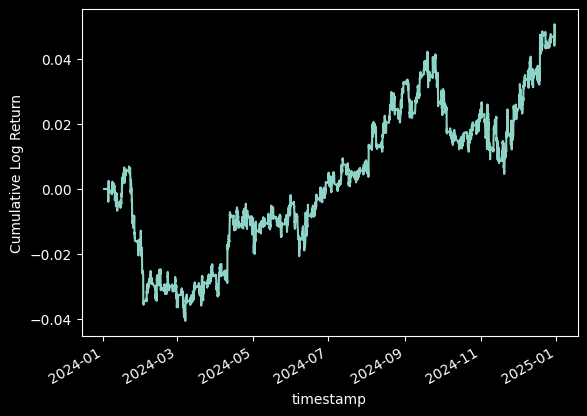

In [13]:
data["r"] = np.log(data["close"]).diff().shift(-1)
strat_r = data["signal"] * data["r"]

pf = strat_r[strat_r > 0].sum() / strat_r[strat_r < 0].abs().sum()
print("Profit Factor", lookback, pf)

strat_r.cumsum().plot()
plt.ylabel("Cumulative Log Return")
plt.show()

In [16]:
data[data["signal"] != data["signal"].shift()].index

DatetimeIndex(['2024-01-01 22:00:00', '2024-01-05 00:00:00',
               '2024-01-09 09:00:00', '2024-01-10 15:00:00',
               '2024-01-12 11:00:00', '2024-01-17 17:00:00',
               '2024-01-22 14:00:00', '2024-01-23 06:00:00',
               '2024-01-23 10:00:00', '2024-01-24 13:00:00',
               ...
               '2024-11-24 22:00:00', '2024-11-29 09:00:00',
               '2024-12-03 13:00:00', '2024-12-06 14:00:00',
               '2024-12-11 13:00:00', '2024-12-17 08:00:00',
               '2024-12-20 08:00:00', '2024-12-24 02:00:00',
               '2024-12-26 03:00:00', '2024-12-30 05:00:00'],
              dtype='datetime64[s]', name='timestamp', length=147, freq=None)